In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import visual_behavior.data_access.loading as loading

### get data cache using `from_s3_cache` method

Use cache directory on the network containing NWB files saved from AWS 

In [4]:
cache_dir = loading.get_platform_analysis_cache_dir()
print(cache_dir)

//allen/programs/braintv/workgroups/nc-ophys/visual_behavior/platform_paper_cache


In [5]:
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=cache_dir)

### get experiments table 

`ophys_experiment_table` contains a record of each unique 2P field of view recorded in each session. 
One `ophys_session_id` can have 8 imaging planes, corresonding to 8 `ophys_experiment_ids`. 
A given imaging plane that is recorded across multiple sessions is linked by its `ophys_container_id`. 

In [6]:
experiments_table = cache.get_ophys_experiment_table()

# should only include data from project codes associated with visual behavior data release
experiments_table.project_code.unique()

array(['VisualBehaviorMultiscope', 'VisualBehaviorTask1B',
       'VisualBehavior', 'VisualBehaviorMultiscope4areasx2d'],
      dtype=object)

In [7]:
print(len(experiments_table.mouse_id.unique()))

107


### get behavior sessions for some mouse

In [8]:
behavior_sessions = cache.get_behavior_session_table()

In [9]:
mouse_id = experiments_table.mouse_id.unique()[50]
            
# look at training history for this mouse
mouse_beh_data = behavior_sessions[behavior_sessions.mouse_id==mouse_id].sort_values(by='date_of_acquisition')
mouse_beh_data[['mouse_id', 'session_type', 'ophys_experiment_id']]

,mouse_id,session_type,ophys_experiment_id
behavior_session_id,,,
827312851,438912,TRAINING_0_gratings_autorewards_15min,NaN
828646634,438912,TRAINING_1_gratings,NaN
829128279,438912,TRAINING_1_gratings,NaN
829591790,438912,TRAINING_1_gratings,NaN
830201482,438912,TRAINING_1_gratings,NaN
830867799,438912,TRAINING_1_gratings,NaN
831834820,438912,TRAINING_1_gratings,NaN
832325815,438912,TRAINING_2_gratings_flashed,NaN
832990071,438912,TRAINING_2_gratings_flashed,NaN


### get ophys_containers for this mouse 

In [10]:
mouse_data = experiments_table[experiments_table.mouse_id==mouse_id].sort_values(by='date_of_acquisition')
ophys_container_ids = mouse_data.ophys_container_id.unique()
len(ophys_container_ids)

6

### pick a container and experiment

In [11]:
ophys_container_id = ophys_container_ids[0]
experiment_id = experiments_table[experiments_table.ophys_container_id==ophys_container_id].index.values[0]
experiment_id

847267624

### load ophys dataset for this experiment

In [12]:
dataset = cache.get_behavior_ophys_experiment(experiment_id)

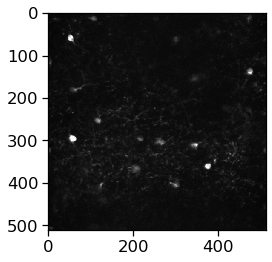

In [13]:
plt.imshow(dataset.max_projection, cmap='gray')

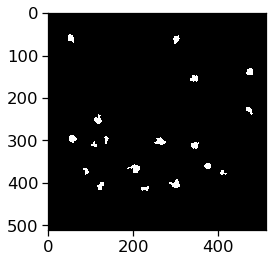

In [14]:
plt.imshow(dataset.segmentation_mask_image, cmap='gray')

In [15]:
dataset.dff_traces

,cell_roi_id,dff
cell_specimen_id,,
1086512261,1080854740,"[19.712932586669922, 17.267105102539062, 16.28..."
1086512470,1080854747,"[0.9266295433044434, 1.1095601320266724, 1.500..."
1086517629,1080854764,"[6.427168369293213, 6.252079963684082, 7.32800..."
1086512613,1080854787,"[3.692857027053833, 4.920130252838135, 2.92668..."
1086512699,1080854813,"[3.9970669746398926, 2.5939831733703613, 2.423..."
1086516047,1080854856,"[0.4880005419254303, 0.5942140221595764, 0.141..."
1086513015,1080854860,"[5.67019510269165, 2.952738046646118, 1.693332..."
1086516106,1080854864,"[1.7547324895858765, 3.012686014175415, 2.1593..."
1086513277,1080854869,"[2.9231276512145996, 1.0498965978622437, 1.450..."


### generate a dataframe of stimulus aligned traces for all cells in this dataset

This VBA helper function calls core functions in `mindscope_utilities`, including `mindscope_utilities.visual_behavior_ophys.data_formatting.get_stimulus_response_df` and `mindscope_utilities`, including `mindscope_utilities.visual_behavior_ophys.data_formatting.get_annotated_stimulus_presentations`

In [16]:
stimulus_response_df = loading.get_stimulus_response_df(dataset, time_window=[-3, 3.1], 
                                                        interpolate=True, output_sampling_rate=30,
                                                        data_type='filtered_events', event_type='all')

generating response df


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:58<00:00,  3.25s/it]


(4797, 18)


`stimulus_response_df` contains the stimulus aligned trace for every cell, for every stimulus presentation in the session, in a defined time window around stimulus onset

In [17]:
stimulus_response_df.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,ophys_frame_rate,data_type,event_type,...,reward_rate_per_second,reward_rate,engaged,engagement_state,time_from_last_change,pre_change,pre_omitted,post_omitted,licked,lick_on_next_flash
0,0,1086512261,"[0.70243856882285, 0.6863980135004634, 0.52836...","[-3.0, -2.966666666666667, -2.933333333333333,...",0.0,0.0,1.0,30,filtered_events,all,...,0.0,0.0,False,disengaged,NaN,False,False,NaN,False,True
1,0,1086512470,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-3.0, -2.966666666666667, -2.933333333333333,...",0.0,0.0,1.0,30,filtered_events,all,...,0.0,0.0,False,disengaged,NaN,False,False,NaN,False,True
2,0,1086512613,"[1.0438717748055092e-07, 1.0060066557098603e-0...","[-3.0, -2.966666666666667, -2.933333333333333,...",0.0,0.0,1.0,30,filtered_events,all,...,0.0,0.0,False,disengaged,NaN,False,False,NaN,False,True
3,0,1086512699,"[2.768119659404089e-08, 2.6677096443963818e-08...","[-3.0, -2.966666666666667, -2.933333333333333,...",0.0,0.0,1.0,30,filtered_events,all,...,0.0,0.0,False,disengaged,NaN,False,False,NaN,False,True
4,0,1086513015,"[1.7814280848396525e-07, 1.716809049991857e-07...","[-3.0, -2.966666666666667, -2.933333333333333,...",0.0,0.0,1.0,30,filtered_events,all,...,0.0,0.0,False,disengaged,NaN,False,False,NaN,False,True


### plot average response for a few conditions

You can easily plot the population average response for all rows of the table (all stimulus conditions, all cells), or separating out just omissions or just changes

Text(0, 0.5, 'population response')

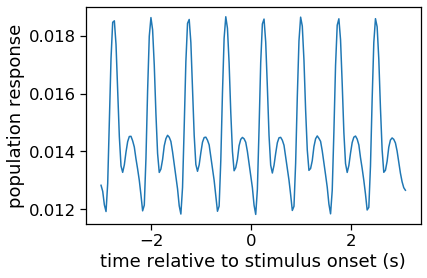

In [18]:
plt.plot(stimulus_response_df.trace_timestamps.mean(), stimulus_response_df.trace.mean())
plt.xlabel('time relative to stimulus onset (s)')
plt.ylabel('population response')

Text(0, 0.5, 'population response')

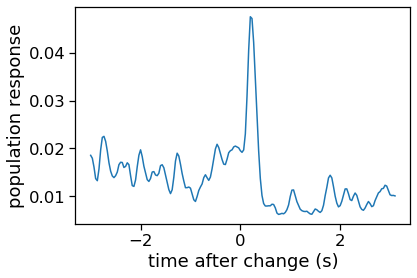

In [19]:
# changes
traces = stimulus_response_df[stimulus_response_df.is_change==True].trace.values
timestamps = stimulus_response_df.trace_timestamps.values[0] # timestamps are shared across all rows
plt.plot(timestamps, traces.mean())
plt.xlabel('time after change (s)')
plt.ylabel('population response')

Text(0, 0.5, 'population response')

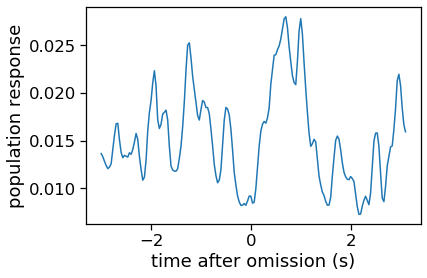

In [20]:
# omissions
traces = stimulus_response_df[stimulus_response_df.omitted==True].trace.values
timestamps = stimulus_response_df.trace_timestamps.values[0] # timestamps are shared across all rows
plt.plot(timestamps, traces.mean())
plt.xlabel('time after omission (s)')
plt.ylabel('population response')

There is a lot of metadata for each stimulus presentation

In [21]:
stimulus_response_df.keys()

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response',
       'p_value_gray_screen', 'ophys_frame_rate', 'data_type', 'event_type',
       'interpolate', 'output_sampling_rate', 'response_window_duration',
       'start_time', 'stop_time', 'duration', 'image_name', 'image_index',
       'is_change', 'omitted', 'start_frame', 'end_frame', 'image_set',
       'licks', 'mean_running_speed', 'mean_pupil_width', 'reward_rate_trials',
       'epoch', 'trials_id', 'change_time', 'go', 'catch', 'aborted',
       'auto_rewarded', 'hit', 'miss', 'false_alarm', 'correct_reject',
       'response_time', 'response_latency', 'reward_time', 'reward_volume',
       'rewarded', 'reward_rate_per_second', 'reward_rate', 'engaged',
       'engagement_state', 'time_from_last_change', 'pre_change',
       'pre_omitted', 'post_omitted', 'licked', 'lick_on_next_flash'],
      dtype='object')

We can pull out changes where there was a lick vs. no lick (or alternatively use the `hit` and `miss` columns)

Text(0, 0.5, 'population response')

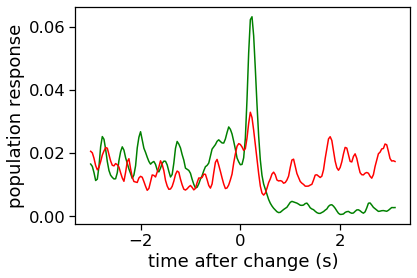

In [22]:
# hits vs. misses
hit_traces = stimulus_response_df[(stimulus_response_df.is_change==True)&
                                 (stimulus_response_df.licked==True)].trace.values
miss_traces = stimulus_response_df[(stimulus_response_df.is_change==True)&
                                 (stimulus_response_df.licked==False)].trace.values
timestamps = stimulus_response_df.trace_timestamps.values[0] # timestamps are shared across all rows
plt.plot(timestamps, hit_traces.mean(), color='g')
plt.plot(timestamps, miss_traces.mean(), color='r')
plt.xlabel('time after change (s)')
plt.ylabel('population response')

### get population response vector across trials for some image

In [23]:
# lets use a shorter variable name
sdf = stimulus_response_df.copy()

In [24]:
images = sdf.image_name.unique()
print(images)

image0 = images[0]
image0_presentations = sdf[sdf.image_name==image0].stimulus_presentations_id.unique()

['im065' 'im085' 'im063' 'im062' 'omitted' 'im066' 'im077' 'im061' 'im069']


In [25]:
# get the mean response for all cells for one trial (stimulus_presentation) for this image
response_vector = sdf[sdf.stimulus_presentations_id==image0_presentations[0]].mean_response.values
response_vector

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03207745, 0.        , 0.        , 0.        , 0.        ,
       0.11842101, 0.        , 0.        , 0.05176257, 0.        ,
       0.        , 0.        , 0.        ])

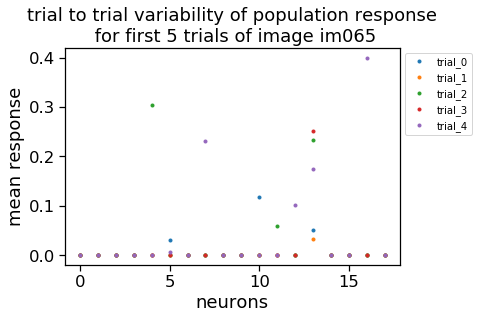

In [26]:
# plot for a few trials
for i in image0_presentations[:5]:
    response_vector = sdf[sdf.stimulus_presentations_id==i].mean_response.values
    plt.plot(response_vector, '.', label='trial_'+str(i))
plt.xlabel('neurons')
plt.ylabel('mean response')
plt.title('trial to trial variability of population response\n for first 5 trials of image '+image0)
plt.legend(bbox_to_anchor=(1,1), fontsize='medium')

### average population response across images 

In [27]:
mean_image_responses = sdf.groupby(['image_name', 'cell_specimen_id']).mean()[['mean_response']]
mean_image_responses

mean_response
image_name cell_specimen_id               
im061      1086512261             0.062921
           1086512470             0.017923
           1086512613             0.010092
           1086512699             0.000635
           1086513015             0.027187
...                                    ...
omitted    1086515236             0.001313
           1086516047             0.005951
           1086516106             0.007940
           1086517629             0.053272
           1086518259             0.001656

[162 rows x 1 columns]

In [28]:
image = images[0]
image_pop_vector = mean_image_responses.loc[image, :]
image_pop_vector

,mean_response
cell_specimen_id,
1086512261,0.017440
1086512470,0.019698
1086512613,0.005232
1086512699,0.000651
1086513015,0.019964
1086513277,0.002485
1086513513,0.007527
1086513586,0.002987
1086513969,0.002998


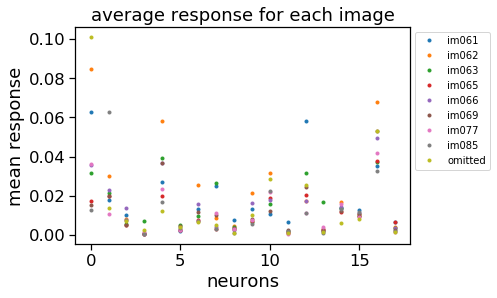

In [29]:
for image in np.sort(images):
    image_pop_vector = mean_image_responses.loc[image, :].mean_response.values
    plt.plot(image_pop_vector, '.', label=image)
plt.xlabel('neurons')
plt.ylabel('mean response')
plt.title('average response for each image')
plt.legend(bbox_to_anchor=(1,1), fontsize='medium')


### stimulus_response_df also works for behavior timeseries

check the documentation for what `data_type` values are accepted

In [30]:
help(loading.get_stimulus_response_df)

Help on function get_stimulus_response_df in module visual_behavior.data_access.loading:

get_stimulus_response_df(dataset, time_window=[-3, 3.1], interpolate=True, output_sampling_rate=30, data_type='filtered_events', event_type='all', load_from_file=True)
    Load a dataframe with stimulus aligned traces for all cells (or for a given behavior timeseries) using mindscope_utilities
    and merges with annotated stimulus_presentations table that includes behavior metadata
    Will interpolate traces to desired output_sampling_rate if interpolate = True
    Works for cell traces (dF/F, events, filtered_events) or behavioral timeseries (running, pupil, lick rate)
    dataframe can include all stimulus_presentations in the session (event_type='all')
    or it can be limited to just changes (event_type='changes') or omissions (event_type='omissions) to make loading faster
    If the response_df has been pre-generated and saved to the default cache directory, this function will load the pre-

In [31]:
# use a different data_type, and set event_type to just get changes
running_traces = loading.get_stimulus_response_df(dataset, time_window=[-2, 2.1], 
                                                        interpolate=True, output_sampling_rate=30,
                                                        data_type='running_speed', event_type='changes')

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.81it/s]

generating response df


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.81it/s]


(202, 1)


Text(0, 0.5, 'mean running speed (cm/s)')

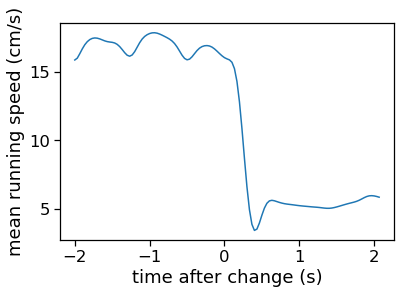

In [32]:
plt.plot(running_traces.trace_timestamps.mean(), running_traces.trace.mean())
plt.xlabel('time after change (s)')
plt.ylabel('mean running speed (cm/s)')

Marina also has code to compile `stimulus_response_df`s across multiple experiments to facilitate within and across session analysis - for a future tutorial ;) 